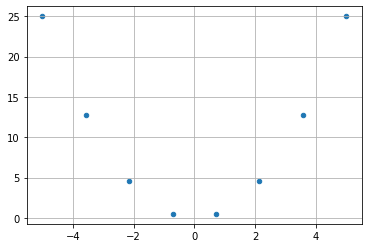

In [5]:
import math
from matplotlib import pyplot as plt

N = 7 #количество точек
L0 = -5 #начальная точка
L1 = 5 #конечная
inputfile = "input" #имя файла с входными данными
outputfile = "output" #имя файла выходных данных

X = range(N+1)
X = [L0 + x/N*(L1-L0) for x in X]
Y = [x**2 for x in X] #функция здесь

plt.scatter(X, Y, s=20)
plt.grid()
bottom, top = plt.ylim()

from decimal import Decimal
def format_e(n):
    a = '%e' % n
    return a.split('e')[0].rstrip('0').rstrip('.') + 'e' + a.split('e')[1]

file = open(inputfile, "w")
file.write(str(N)+"\n")

for i in range(N):
    file.write(str(format_e(Decimal(X[i]))) + " " + str(format_e(Decimal(Y[i]))) + "\n")

file.close()
plt.show()

## Non-parallel

In [6]:
import os
exitcodes = {1*256:"no input or output filenames found", 
             2*256:"cannot open input file", 
             3*256:"cannot open output file"}

exitcode = os.system("gcc Newton.c -o Newton.out -lm")

if (exitcode == 0):
    exitcode = os.system("./Newton.out " + inputfile + " " + outputfile)#на Windows
    #для запуска на Linux "Interp.out " замените на "./Interp.out "

if (exitcode != 0):
    print("An error occured:", exitcodes.get(exitcode, 0))

Worktime is 0.0


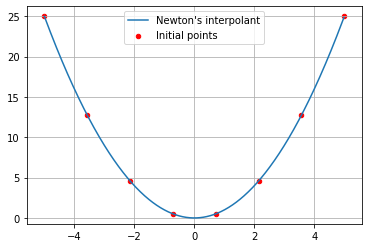

In [7]:
file = open(outputfile, "r")
interpolant = file.readline()
worktime = float(file.readline()[:-1])
file.close()

B = interpolant[:-1].split(" ")
B = [float(b) for b in B]

M = N*100 #для изображения интерполянта

def mul(x, i):
    P = 1.0
    while(i+1):
        P *= (x-X[i])
        i -= 1
    return P

def interp(x):
    return sum([B[i]*mul(x, i-1) for i in range(N)])

X_i = [L0 + x/M*(L1-L0) for x in range(M)]
I = [interp(x) for x in X_i]

plt.plot(X_i, I, label="Newton's interpolant")
plt.scatter(X, Y, color='r', s=20, label="Initial points")
plt.ylim(bottom, top)
plt.legend()
plt.grid()

print("Worktime is", worktime)

## Parallel

In [42]:
import os
outputfile = "output_parallel" #имя файла выходных данных

exitcode = os.system("mpicc Newton_parallel.c -o Newton_parallel.out -lm")

if (exitcode == 0):
    exitcode = os.system("mpiexec Newton_parallel.out " + inputfile + " " + outputfile + " -n 4")

if (exitcode != 0):
    print("An error occured:", exitcodes.get(exitcode, 0))

Worktime is 0.0


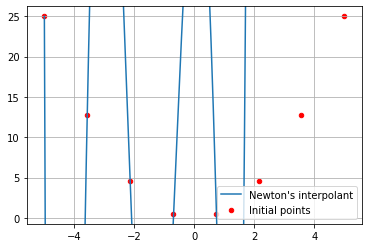

In [3]:
file = open(outputfile, "r")
interpolant = file.readline()
worktime = float(file.readline()[:-1])
file.close()

B = interpolant[:-1].split(" ")
B = [float(b) for b in B]

M = N*100 #для изображения интерполянта

def mul(x, i):
    P = 1.0
    while(i+1):
        P *= (x-X[i])
        i -= 1
    return P

def interp(x):
    return sum([B[i]*mul(x, i-1) for i in range(N)])

X_i = [L0 + x/M*(L1-L0) for x in range(M)]
I = [interp(x) for x in X_i]

plt.plot(X_i, I, label="Newton's interpolant")
plt.scatter(X, Y, color='r', s=20, label="Initial points")
plt.ylim(bottom, top)
plt.legend()
plt.grid()

print("Worktime is", worktime)